In [1]:
# Laplacian Smoothing - giải quyết vấn đề số 0
# p(xi|y) = p(xi)+1 / V + N_dictionary

# Log Likelihood

In [ ]:
nltk.download('all')

### 1. Import libraries

In [95]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import joblib


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nhatthuong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nhatthuong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2. download dataset

In [96]:
!gdown --id 1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R

/bin/bash: line 1: gdown: command not found


### 3. Loading Dataset

In [97]:
DATASET_PATH = '2cls_spam_text_cls.csv'
df = pd.read_csv(DATASET_PATH)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [98]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


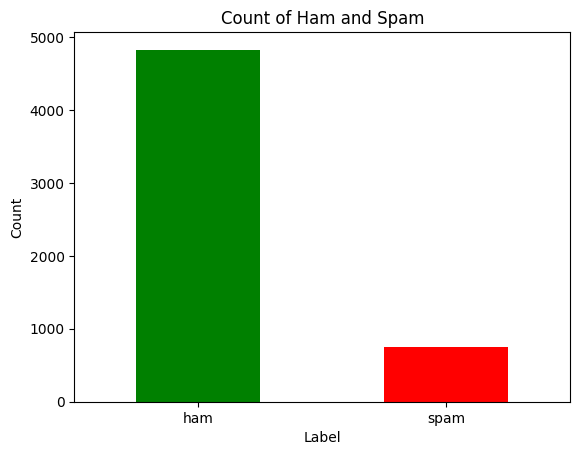

In [99]:
label_counts = df['Category'].value_counts()
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Count of Ham and Spam')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.show()

### 4. Read Dataset

In [100]:
messages = df['Message'].values.tolist()
labels = df['Category'].values.tolist()

### 5. Preprocessing dataset

In [101]:
le = LabelEncoder()
y = le.fit_transform(labels)
print(f'Classes: {le.classes_}')
print(f'Encoded labels: {y}')

Classes: ['ham' 'spam']
Encoded labels: [0 0 1 ... 0 0 0]


In [102]:
# messsage -> lower case -> punctuation removal -> tokenize -> remove stopwrod -> stemming
def lowercase(text):
    return text.lower()

def punctuation_removal(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = nltk.corpus.stopwords.words('english')
    return [token for token in tokens if token not in stop_words]

def stemming(tokens):
    stemmer = nltk.PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

def preprocess_text(text):
    text = lowercase(text)
    text = punctuation_removal(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)
    return tokens

In [103]:
def process(text):
    return [1, text]
arr = [1,2,3,4,5]
arr2 = [process(i) for i in arr]
print(arr2)

[[1, 1], [1, 2], [1, 3], [1, 4], [1, 5]]


In [104]:
messages = [preprocess_text(message) for message in messages]

In [105]:
def create_dictionary(messages):
    dictionary = []

    for tokens in messages:
        for token in tokens:
            if token not in dictionary:
                dictionary.append(token)

    return dictionary

def create_features(tokens, dictionary):
    features = np.zeros(len(dictionary))
    for token in tokens:
        if token in dictionary:
            features[dictionary.index(token)] += 1
    return features

In [106]:
print(np.zeros(len(dictionary)))

[0. 0. 0. ... 0. 0. 0.]


In [107]:
dictionary = create_dictionary(messages)
X = np.array([create_features(tokens, dictionary) for tokens in messages])

In [108]:
print(X)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [114]:
VAL_SIZE = 0.2
TEST_SIZE = 0.125
SEED = 0

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=VAL_SIZE,
                                                  shuffle=True,
                                                  random_state=SEED)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size=TEST_SIZE,
                                                    shuffle=True,
                                                    random_state=SEED)

In [115]:
%%time
model = GaussianNB()
print('Start training...')
model = model.fit(X_train, y_train)
print('Training completed!')
joblib.dump(model, 'gaussian_nb_model.pkl')

Start training...
Training completed!
CPU times: user 320 ms, sys: 125 ms, total: 445 ms
Wall time: 442 ms


['gaussian_nb_model.pkl']

In [116]:
%ls

2cls_spam_text_cls.csv  main.py     text_classifier.ipynb
corpora/                static/     tokenizers/
gaussian_nb_model.pkl   templates/


In [117]:
loaded_model = joblib.load('gaussian_nb_model.pkl')

In [118]:
y_val_pred = loaded_model.predict(X_val)
y_test_pred = loaded_model.predict(X_test)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Val accuracy: {val_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Val accuracy: 0.8816143497757848
Test accuracy: 0.8602150537634409


In [119]:
def predict(text, model, dictionary):
    processed_text = preprocess_text(text)
    features = create_features(text, dictionary)
    print(features)
    features = np.array(features).reshape(1, -1)
    print(features)
    prediction = model.predict(features)
    prediction_cls = le.inverse_transform(prediction)[0]
    return prediction_cls

In [125]:
test_input = "Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged"
prediction_cls = predict(test_input, loaded_model, dictionary)
print(f'Prediction: {prediction_cls}')

[0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]]
Prediction: ham
